### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

### Loading Dataset

In [2]:
movie=pd.read_csv('IMDb Movies India.txt',delimiter=',')

### General Information 
Here, all the basic information about the Dataset that are required are given.

In [3]:
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
movie.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [5]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
movie.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [7]:
movie.dropna(inplace=True)

In [8]:
movie.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [9]:
movie.shape

(5659, 10)

In [10]:
movie['Votes']=movie['Votes'].apply(lambda x: str(x).replace(',',''))
movie['Votes']=movie['Votes'].astype('int')

movie['Duration']=movie['Duration'].apply(lambda x: str(x).replace('min',''))
movie['Duration']=movie['Duration'].astype('int')

movie['Year']=movie['Year'].apply(lambda x: str(x).replace('(',''))
movie['Year']=movie['Year'].apply(lambda x: str(x).replace(')',''))
movie['Year']=movie['Year'].astype('int')

movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [11]:
movie.describe()

,Year,Duration,Rating,Votes
count,5659.000000,5659.000000,5659.000000,5659.000000
mean,1996.247570,133.439124,5.898533,2697.649585
std,19.741839,25.319939,1.381165,13651.503584
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,119.000000,5.000000,30.000000
50%,2002.000000,135.000000,6.100000,131.000000
75%,2013.000000,150.000000,6.900000,922.500000
max,2021.000000,321.000000,10.000000,591417.000000


### Data Visualization
Here, Information of the required Data is visualized for much proper view of the Dataset.

In [12]:
def countplot(Column):
    global movie
    colors=['#036666','#14746f','#248277','#358f80','#469d89','#56ab91','#67b99a','#78c6a3','#88d4ab','#99e2b4']
    sns.countplot(data=movie,y=Column[:10],order=movie[Column][:10].value_counts().index,palette=colors)
    plt.show()

In [13]:
def pie_plot(Column):
    global movie
    plt.figure(figsize=(5,4),dpi=100)
    colors=['#0B132B','#141C36','#1C2541','#2B3B56','#3A506B','#436C80','#4B8895','#5BC0BE','#84D0CF','#ADE0DF']
    movie[Column].value_counts().sort_values(ascending=False)[:10].plot(kind='pie',colors=colors)
    plt.xlabel(Column)
    plt.ylabel('')
    plt.show()

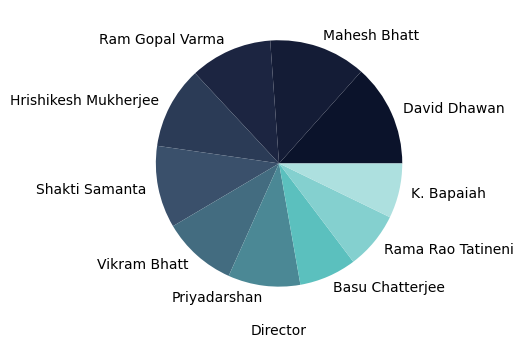

In [14]:
pie_plot('Director')

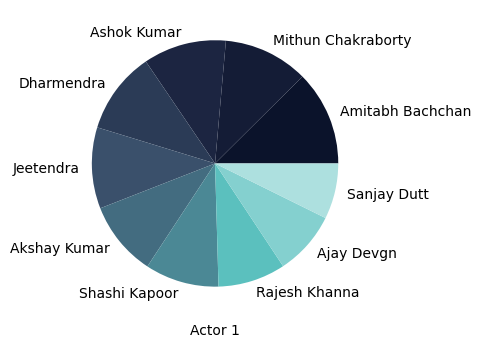

In [15]:
pie_plot('Actor 1')

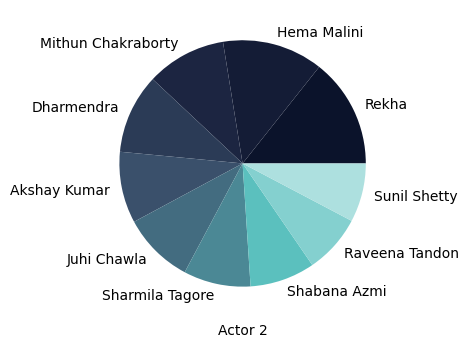

In [16]:
pie_plot('Actor 2')

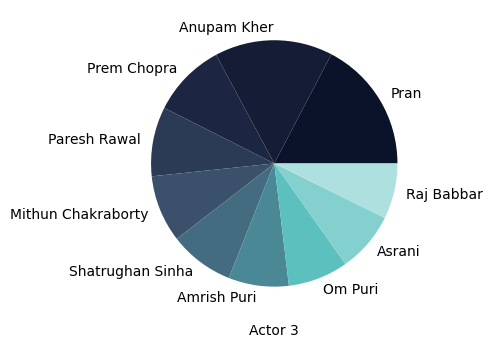

In [17]:
pie_plot('Actor 3')

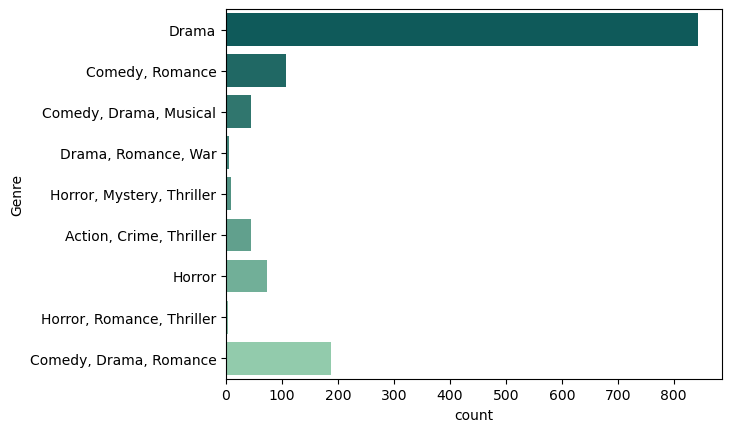

In [18]:
countplot('Genre')

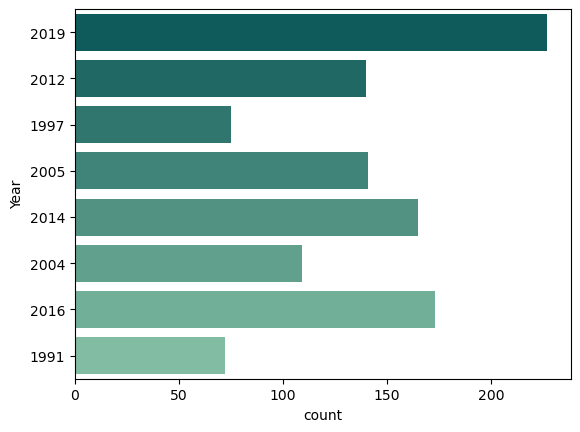

In [19]:
countplot('Year')

### Preparing the Dependent and independent variables for data modelling

In [20]:
X=movie[['Year','Duration','Votes']]
Y=movie['Rating']

In [21]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

### Data Modelling

In [22]:
lr=LinearRegression()
dtr=DecisionTreeRegressor(random_state=1)
knr=KNeighborsRegressor(n_neighbors=5)

In [23]:
lr.fit(x_train,y_train)
dtr.fit(x_train,y_train)
knr.fit(x_train,y_train)

lr_pred=lr.predict(x_test)
dtr_pred=lr.predict(x_test)
knr_pred=lr.predict(x_test)

lr_accuracy=r2_score(y_test,lr_pred)
dtr_accuracy=r2_score(y_test,dtr_pred)
knr_accuracy=r2_score(y_test,knr_pred)

In [24]:
models=['LINEAR REGRESSION','DECISION TREE','K NEAREST NEIGHBOR']
accuracy=[lr_accuracy,dtr_accuracy,knr_accuracy]
for i,j in zip(models,accuracy):
    print('Model Name:',i)
    print('Accuracy Score: {}%'.format(j*100))

Model Name: LINEAR REGRESSION
Accuracy Score: 9.799084043012417%
Model Name: DECISION TREE
Accuracy Score: 9.799084043012417%
Model Name: K NEAREST NEIGHBOR
Accuracy Score: 9.799084043012417%
